In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [51]:
set_data = pd.read_excel('set.xlsx',engine= 'openpyxl',header=0)
set_eps = pd.read_excel('set_eps.xlsx',engine= 'openpyxl',header=0)
gdpq = pd.read_excel('gdpq.xlsx',engine= 'openpyxl',header=0)



In [52]:
set_data

,Date,Prior,Open,High,Low,Close,PE
0,2016-01-04,1288.02,1286.29,1286.36,1260.96,1263.41,22.12
1,2016-01-05,1263.41,1267.20,1270.07,1251.87,1253.34,21.99
2,2016-01-06,1253.34,1249.82,1260.88,1247.89,1260.04,22.10
3,2016-01-07,1260.04,1237.81,1244.04,1224.83,1224.83,21.46
4,2016-01-08,1224.83,1232.31,1246.70,1228.18,1244.18,21.81
...,...,...,...,...,...,...,...
1417,2021-10-28,1627.61,1626.27,1632.30,1622.56,1624.31,20.81
1418,2021-10-29,1624.31,1627.01,1629.25,1619.14,1623.43,21.02
1419,2021-11-01,1623.43,1627.54,1632.73,1611.39,1613.78,20.89
1420,2021-11-02,1613.78,1616.86,1621.69,1608.64,1617.89,20.96


In [57]:
set_eps


,Date,Prior,Open,High,Low,Close,PE,EPS
0,2021-11-03,1617.89,1620.90,1623.08,1607.72,1611.92,19.3909,83.1235
1,2021-11-02,1613.78,1616.86,1621.69,1608.64,1617.89,19.4637,83.1246
2,2021-11-01,1623.43,1627.54,1632.73,1611.39,1613.78,19.4140,83.1221
3,2021-10-29,1624.31,1627.01,1629.25,1619.14,1623.43,19.5307,83.1111
4,2021-10-28,1627.61,1626.27,1632.30,1622.56,1624.31,19.5438,83.6187
...,...,...,...,...,...,...,...,...
3083,NaT,NaN,NaN,NaN,NaN,NaN,NaN,54.6940
3084,NaT,NaN,NaN,NaN,NaN,NaN,NaN,54.6926
3085,NaT,NaN,NaN,NaN,NaN,NaN,NaN,54.6938
3086,NaT,NaN,NaN,NaN,NaN,NaN,NaN,54.6979


In [65]:
set_eps.groupby(set_eps.Date.dt.year)['EPS'].mean()

Date
2016.0    85.723651
2017.0    96.463777
2018.0    99.596731
2019.0    88.639982
2020.0    62.603854
2021.0    60.969454
Name: EPS, dtype: float64

In [54]:
gdpq

,Date,GDP
0,2016-03-31,3597737000000
1,2016-06-30,3557050000000
2,2016-09-30,3628315000000
3,2016-12-31,3807235000000
4,2017-03-31,3830606000000
5,2017-06-30,3753348000000
6,2017-09-30,3854593000000
7,2017-12-31,4050117000000
8,2018-03-31,4051915000000
9,2018-06-30,3998560000000


In [42]:
gdpq.Date.dt.year

0     2016
1     2016
2     2016
3     2016
4     2017
5     2017
6     2017
7     2017
8     2018
9     2018
10    2018
11    2018
12    2019
13    2019
14    2019
15    2019
16    2020
17    2020
18    2020
19    2020
20    2021
21    2021
Name: Date, dtype: int64

In [48]:
gdpq


,Date,GDP
0,2016-03-31,3597737000000
1,2016-06-30,3557050000000
2,2016-09-30,3628315000000
3,2016-12-31,3807235000000
4,2017-03-31,3830606000000
5,2017-06-30,3753348000000
6,2017-09-30,3854593000000
7,2017-12-31,4050117000000
8,2018-03-31,4051915000000
9,2018-06-30,3998560000000


In [68]:
set_data

,Date,Prior,Open,High,Low,Close,PE
0,2016-01-04,1288.02,1286.29,1286.36,1260.96,1263.41,22.12
1,2016-01-05,1263.41,1267.20,1270.07,1251.87,1253.34,21.99
2,2016-01-06,1253.34,1249.82,1260.88,1247.89,1260.04,22.10
3,2016-01-07,1260.04,1237.81,1244.04,1224.83,1224.83,21.46
4,2016-01-08,1224.83,1232.31,1246.70,1228.18,1244.18,21.81
...,...,...,...,...,...,...,...
1417,2021-10-28,1627.61,1626.27,1632.30,1622.56,1624.31,20.81
1418,2021-10-29,1624.31,1627.01,1629.25,1619.14,1623.43,21.02
1419,2021-11-01,1623.43,1627.54,1632.73,1611.39,1613.78,20.89
1420,2021-11-02,1613.78,1616.86,1621.69,1608.64,1617.89,20.96


In [69]:
set_eps

,Date,Prior,Open,High,Low,Close,PE,EPS
0,2021-11-03,1617.89,1620.90,1623.08,1607.72,1611.92,19.3909,83.1235
1,2021-11-02,1613.78,1616.86,1621.69,1608.64,1617.89,19.4637,83.1246
2,2021-11-01,1623.43,1627.54,1632.73,1611.39,1613.78,19.4140,83.1221
3,2021-10-29,1624.31,1627.01,1629.25,1619.14,1623.43,19.5307,83.1111
4,2021-10-28,1627.61,1626.27,1632.30,1622.56,1624.31,19.5438,83.6187
...,...,...,...,...,...,...,...,...
3083,NaT,NaN,NaN,NaN,NaN,NaN,NaN,54.6940
3084,NaT,NaN,NaN,NaN,NaN,NaN,NaN,54.6926
3085,NaT,NaN,NaN,NaN,NaN,NaN,NaN,54.6938
3086,NaT,NaN,NaN,NaN,NaN,NaN,NaN,54.6979


In [56]:
group_gdp = gdpq.groupby(gdpq.Date.dt.year)['GDP'].mean()

In [73]:
group_gdp

Date
2016    3.647584e+12
2017    3.872166e+12
2018    4.092176e+12
2019    4.224522e+12
2020    3.924572e+12
2021    3.997128e+12
Name: GDP, dtype: float64

In [12]:
df.dropna(subset=['Close'],inplace = True)

In [74]:
df = set_data.merge(set_eps, left_on='Date', right_on='Date')

In [85]:
df = df.set_index('Date')

In [87]:
df['gdp'] = ''

In [93]:
group_gdp.loc[2016]

3647584250000.0

In [104]:
for i in range(2016,2022):
    df.loc[str(i),'gdp'] = group_gdp.loc[i]

In [108]:
df

,Prior_x,Open_x,High_x,Low_x,Close_x,PE_x,Prior_y,Open_y,High_y,Low_y,Close_y,PE_y,EPS,gdp
Date,,,,,,,,,,,,,,
2016-01-04,1288.02,1286.29,1286.36,1260.96,1263.41,22.12,1288.02,1286.29,1286.36,1260.96,1263.41,17.3305,72.2368,3647584250000.0
2016-01-05,1263.41,1267.20,1270.07,1251.87,1253.34,21.99,1263.41,1267.20,1270.07,1251.87,1253.34,17.1919,72.2431,3647584250000.0
2016-01-06,1253.34,1249.82,1260.88,1247.89,1260.04,22.10,1253.34,1249.82,1260.88,1247.89,1260.04,17.2866,72.2438,3647584250000.0
2016-01-07,1260.04,1237.81,1244.04,1224.83,1224.83,21.46,1260.04,1237.81,1244.04,1224.83,1224.83,16.8012,72.2363,3647584250000.0
2016-01-08,1224.83,1232.31,1246.70,1228.18,1244.18,21.81,1224.83,1232.31,1246.70,1228.18,1244.18,17.0010,72.2296,3647584250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-28,1627.61,1626.27,1632.30,1622.56,1624.31,20.81,1627.61,1626.27,1632.30,1622.56,1624.31,19.5438,83.6187,3997128500000.0
2021-10-29,1624.31,1627.01,1629.25,1619.14,1623.43,21.02,1624.31,1627.01,1629.25,1619.14,1623.43,19.5307,83.1111,3997128500000.0
2021-11-01,1623.43,1627.54,1632.73,1611.39,1613.78,20.89,1623.43,1627.54,1632.73,1611.39,1613.78,19.4140,83.1221,3997128500000.0


In [109]:
x=df.loc[:,['EPS','gdp']]
y=df['Close_x']

In [118]:
x_train = x.iloc[:995]

In [119]:
y_train = y.iloc[:995]

In [121]:
x_test = x.iloc[996:]
y_test = y.iloc[996:]

In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
df_x_std = scaler.transform(x)

In [123]:
df_x_train_std = scaler.transform(x_train)
df_x_test_std = scaler.transform(x_test)


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [124]:
df_x_train_std

array([[-0.60873566, -1.69991261],
       [-0.60837901, -1.69991261],
       [-0.60833939, -1.69991261],
       ...,
       [ 0.25140521, -0.18649234],
       [ 0.25190904, -0.18649234],
       [ 0.25166562, -0.18649234]])

In [125]:
model = LinearRegression()

In [126]:
reg = model.fit(df_x_train_std, y_train)

In [130]:
np.array(y_test).reshape(-1,1)

array([[1524.59],
       [1523.99],
       [1514.14],
       [1496.06],
       [1519.38],
       [1534.14],
       [1535.79],
       [1535.24],
       [1523.93],
       [1539.84],
       [1532.77],
       [1526.3 ],
       [1527.25],
       [1513.68],
       [1505.54],
       [1491.24],
       [1495.09],
       [1435.56],
       [1439.1 ],
       [1366.41],
       [1395.08],
       [1340.52],
       [1335.72],
       [1375.02],
       [1378.61],
       [1390.83],
       [1364.57],
       [1255.94],
       [1271.25],
       [1249.89],
       [1114.91],
       [1128.91],
       [1046.08],
       [1035.17],
       [1048.15],
       [1044.19],
       [1127.24],
       [1024.46],
       [1033.84],
       [1080.03],
       [1091.96],
       [1099.76],
       [1087.82],
       [1125.86],
       [1105.51],
       [1138.27],
       [1138.84],
       [1214.95],
       [1205.77],
       [1210.48],
       [1228.03],
       [1236.78],
       [1256.35],
       [1236.1 ],
       [1200.15],
       [12

In [143]:
y_pred = model.predict(df_x_test_std)

In [144]:
y_pred

array([1545.18296154, 1544.99373741, 1545.13875029, 1544.71255389,
       1544.65331082, 1544.6064469 , 1544.68249024, 1544.69133249,
       1544.64535279, 1544.64712124, 1387.66360012, 1387.67774771,
       1388.7317438 , 1388.74323872, 1388.74323872, 1388.70963818,
       1388.75738632, 1388.76976547, 1388.760039  , 1388.7777235 ,
       1388.78214462, 1388.80955559, 1388.80336602, 1388.78744997,
       1388.78214462, 1388.78656574, 1388.78833419, 1388.79894489,
       1388.81751362, 1388.81309249, 1388.80425024, 1388.80159757,
       1387.91471999, 1387.91471999, 1387.91471999, 1387.92179379,
       1387.91914111, 1387.92621491, 1387.91471999, 1387.91648844,
       1387.99076333, 1388.0004898 , 1388.69460635, 1388.83431389,
       1389.48687187, 1389.47184005, 1389.59828421, 1389.60712646,
       1389.58059971, 1389.57441013, 1389.51074594, 1389.4771454 ,
       1389.47979807, 1389.44619752, 1388.70963818, 1388.7671128 ,
       1388.76269167, 1390.96352746, 1390.97148548, 1390.98032

In [145]:
print('Score = ', metrics.r2_score(y_test,y_pred))

Score =  -1.0137717319311559


In [146]:
m = model.coef_
b = model.intercept_

In [147]:
m

array([156.19536393,  59.41971573])

In [148]:
b

1516.9676594831365

In [149]:
print("MAE = ",  metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",  metrics.mean_squared_error(y_test,y_pred))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE =  167.7014555242781
MSE =  45392.00635799263
RMSE =  213.05399869045553


In [150]:
df_report = pd.DataFrame({'Actually': y_test, 'Predicted':y_pred})

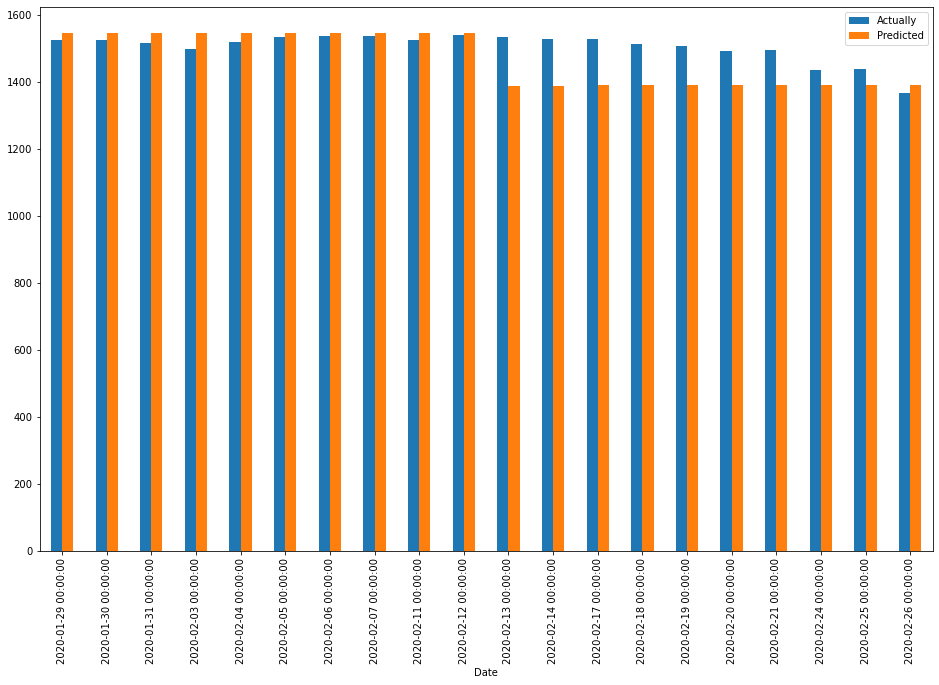

In [151]:
df_report = pd.DataFrame({'Actually': y_test, 'Predicted':y_pred})
df_report = pd.DataFrame({'Actually': y_test, 'Predicted':y_pred})
df1 = df_report.head(20)
df1.plot(kind="bar",figsize=(16,10))
plt.show()
